In [1]:
import matplotlib.pyplot as plt

from phase_portrait import *
import yfinance as yf
import numpy as np
%matplotlib inline

In [2]:
data_nas = yf.download("^IXIC", "2018-01-01","2021-01-01")
data_nas['date'] = data_nas.index
data_nas['value'] =  data_nas[['Adj Close']]
data_nas = data_nas.reset_index(drop=True)
data_nas = data_nas[['date', 'value']]

[*********************100%***********************]  1 of 1 completed


In [3]:
data_nas

,date,value
0,2018-01-02,7006.899902
1,2018-01-03,7065.529785
2,2018-01-04,7077.910156
3,2018-01-05,7136.560059
4,2018-01-08,7157.390137
...,...,...
751,2020-12-24,12804.730469
752,2020-12-28,12899.419922
753,2020-12-29,12850.219727
754,2020-12-30,12870.000000


In [25]:
data_nas_30 = slice_data(data_nas, slice_period=30, reset_index=False)
x_30 = data_nas_30.index
y_30 = data_nas_30['value']
y_30 = y_30.reset_index(drop=True)
x_1 = data_nas.index
y_1 = data_nas['value']

In [5]:
spline = CubicSpline(x_30, y_30, bc_type='clamped')

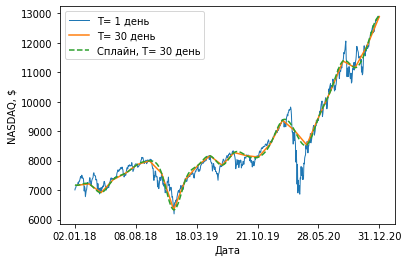

In [34]:
fig, ax = plt.subplots()
xx, deriv = get_phase_portrait(x_30, y_30, deriv_num=2)
tt = np.linspace(x_1[0], x_1[-1], num=deriv[0].shape[0])
ax.plot(x_1, y_1,  label='T= 1 день', linewidth=1)
ax.plot(x_30, y_30, label='T= 30 день')
# ax.plot(tt, deriv[0],'--', label='deriv')
ax.plot(x_1, spline(x_1), '--', label='Сплайн, T= 30 день')
ax.set_ylabel('NASDAQ, $')
ax.set_xlabel('Дата')
ticks_num=6
ax.set_xticks(ticks=get_ticks(x_1, ticks_num), labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))
ax.legend();
plt.savefig(f"Spline_example_nasdaq.png", dpi=200)
plt.show()

In [8]:
# Анимация
from celluloid import Camera

Saving frame 0 of None
Saving frame 1 of None
Saving frame 2 of None
Saving frame 3 of None
Saving frame 4 of None
Saving frame 5 of None
Saving frame 6 of None
Saving frame 7 of None
Saving frame 8 of None
Saving frame 9 of None
Saving frame 10 of None
Saving frame 11 of None
Saving frame 12 of None
Saving frame 13 of None
Saving frame 14 of None
Saving frame 15 of None
Saving frame 16 of None
Saving frame 17 of None
Saving frame 18 of None
Saving frame 19 of None
Saving frame 20 of None
Saving frame 21 of None
Saving frame 22 of None
Saving frame 23 of None
Saving frame 24 of None
Saving frame 25 of None
Saving frame 26 of None
Saving frame 27 of None
Saving frame 28 of None
Saving frame 29 of None
Saving frame 30 of None
Saving frame 31 of None
Saving frame 32 of None
Saving frame 33 of None
Saving frame 34 of None
Saving frame 35 of None
Saving frame 36 of None
Saving frame 37 of None
Saving frame 38 of None
Saving frame 39 of None
Saving frame 40 of None
Saving frame 41 of None


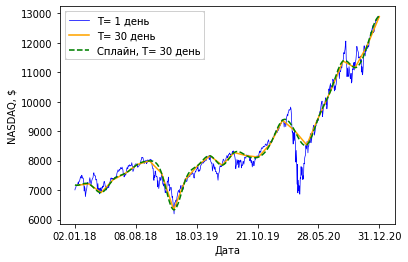

In [30]:
fig, ax = plt.subplots()

camera = Camera(fig)
ax.set_ylabel('NASDAQ, $')
ax.set_xlabel('Дата')
ticks_num = 6
ax.set_xticks(ticks=get_ticks(x_1, ticks_num),
              labels=map(lambda x: x.strftime('%d.%m.%y'), get_ticks(data_nas['date'], ticks_num)))


def plot_30(ax, i, frames):
    ax.plot(x_30[:round(len(x_30) / frames * i)], y_30[:round(len(x_30) / frames * i)], label='T= 30 день',
            color='orange')


def plot_spline(ax, i, frames):
    ax.plot(x_1[:round(len(x_1) / frames * i)], spline(x_1)[:round(len(x_1) / frames * i)], label='Сплайн, T= 30 день',
            color='green', linestyle='--')


ax.plot(x_1, y_1, label='T= 1 день', linewidth=0.7, color='blue')
ax.plot(x_30[0], y_30[0], label='T= 30 день', color='orange')
ax.plot(x_1[0], spline(x_1)[0], label='Сплайн, T= 30 день', color='green', linestyle='--')
ax.legend()
frames = 20

for i in range(frames + 1):
    ax.plot(x_1, y_1, label='T= 1 день', linewidth=0.7, color='blue')
    plot_30(ax, i, frames)
    camera.snap()

for i in range(frames + 1):
    ax.plot(x_1, y_1, label='T= 1 день', linewidth=0.7, color='blue')
    ax.plot(x_30, y_30, label='T= 30 день', color='orange')
    plot_spline(ax, i, frames)
    camera.snap()

animation = camera.animate()
animation.save('celluloid_minimal_2.gif', writer='imagemagick', dpi=200) #, progress_callback=lambda i, n: print(f'Saving frame {i} of {n}'))